# Exploratory Data Analysis E-commerce Shipping Data - HW Data Science Rakamin Academy
### Azriel Rahmansyah Holy
### Batch 19-B

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as st

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Dataset E-commerce Shipping Data

In [2]:
df = pd.read_csv('E-Commerce Shipping Data.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Soal-1 
### Descriptive Statistic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df.duplicated().any()

False

Pengamatan\:

A. `Semua tipe data sesuai dan tidak ada duplikasi data`

B. `Semua kolom tidak memiliki null/missing values (Non-Null Count < Jumlah Baris)`

C. `Semua kolom memiliki nilai summary yang normal/ideal`

# Soal-2
### Univariate Analysis

In [6]:
# Pengelompokan kolom berdasarkan jenisnya
numericals = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Customer_rating','Reached.on.Time_Y.N']
categoricals = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [7]:
# kolom numerik
df[numericals].describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Customer_rating,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729,2.990545,0.596691
std,1.141490,48.063272,1.522860,16.205527,1635.377251,1.413603,0.490584
min,2.000000,96.000000,2.000000,1.000000,1001.000000,1.000000,0.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000,2.000000,0.000000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000,3.000000,1.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000,4.000000,1.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000,5.000000,1.000000


Pengamatan:
1. Kolom `Customer_care_calls` dan `Customer_rating` cukup sebagai simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `Prior_purchases` dan `Discount_offered` termasuk tipe distribusi skew miring ke kanan (mean > median)

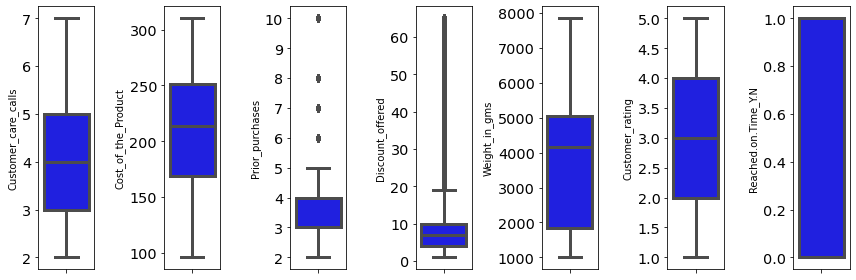

In [8]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

Boxplot:
* Outlier terlihat pada kolom `Prior_purchase` dan `Discount_offered`
* Selain kolom-kolom itu outliernya terlihat normal-normal saja

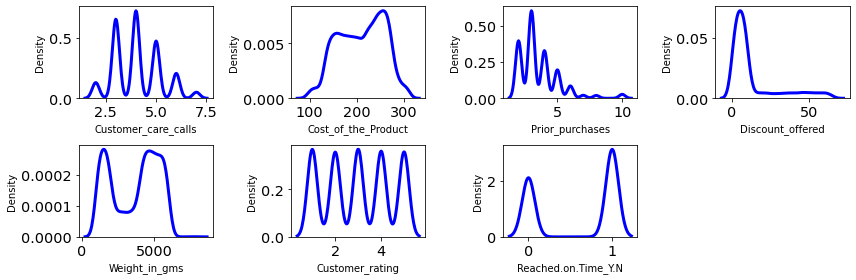

In [9]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Distribution plot:
* Tidak ada satupun kolom yang mendekati distribusi normal
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `Prior_purchases`, dan `Discount_offered` sedikit *skewed* 
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya

In [10]:
# kolom kategori
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Pengamatan:
1. Data dinominasi oleh `Gender` perempuan dengan jumlah pengiriman produk berasal dari `Warehouse F` Menggunakan metode pengiriman `Ship` 
2. Kolom warehouse memiliki kardinalitas (jumlah unique values) yang sedikit lebih tinggi (5) dari kolom yang lainnya. 

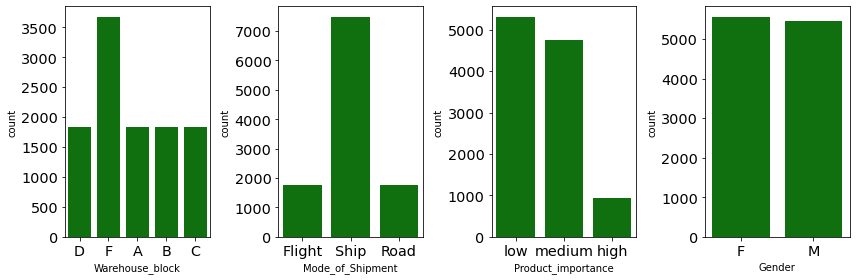

In [11]:
# Individual Countplot (Categorical)
features = categoricals
for i in range(0, len(features)):
    ax = plt.subplot(1, 
                len(features),
                i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()

Pengamatan:
1. Pengiriman produk terbanyak berasal dari warehouse `F` dengan kategori produk `low` 
2. Selain warehouse `F` memiliki nilai value hampir sama dengan warehouse lainnya.

# Soal-3
### Multivariate Analysis

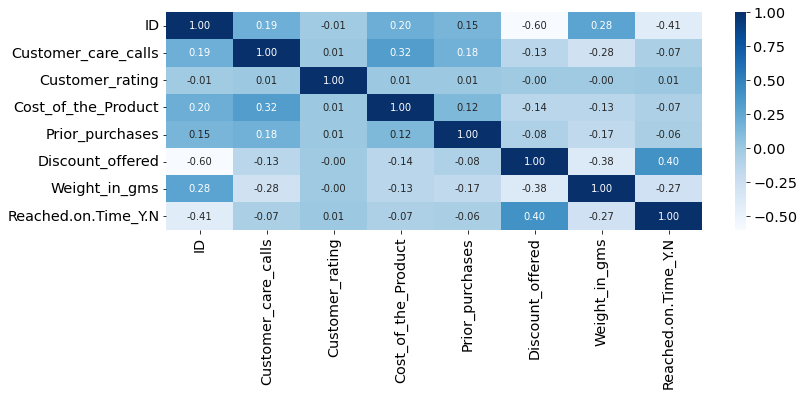

In [12]:
# Hubungan korelasi
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `Reached.on.Time_Y.N` memiliki korelasi positif kuat dengan `Discount_offered`
* Terdapat beberepa korelasi positif lemah
* `Customer_care_calls` juga memiliki korelasi positif cukup kuat dengan `cost_of_the_Product`. Ada kemungkinan kedua *feature* ini redundan

# Soal-4 
### Business Insight

#### Insight Pertama

In [13]:
insight1 = df.groupby(['Customer_care_calls', 'Reached.on.Time_Y.N']).agg({'ID' : 'nunique'}).reset_index()
insight1

,Customer_care_calls,Reached.on.Time_Y.N,ID
0,2,0,222
1,2,1,416
2,3,0,1206
3,3,1,2011
4,4,0,1431
5,4,1,2126
6,5,0,968
7,5,1,1360
8,6,0,490
9,6,1,523


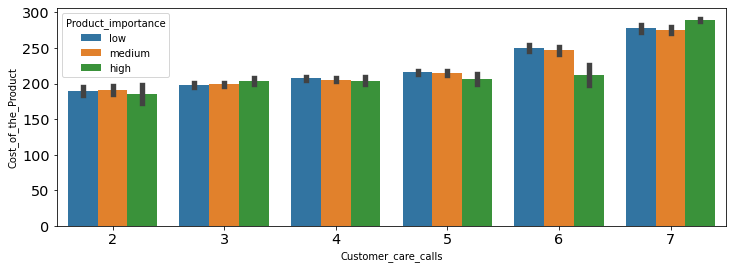

In [14]:
sns.barplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df, hue='Product_importance');

Analisa:
* Ketika nilai `Cost_of_the_Product` tinggi , maka nilai `Customer_care_calls` cenderung naik juga
* Customer cenderung peduli terhadap produk yang dibelinya

Rekomendasi:
* E-commerce menyediakan model automasi untuk real time status shipment produk

#### Insight Kedua

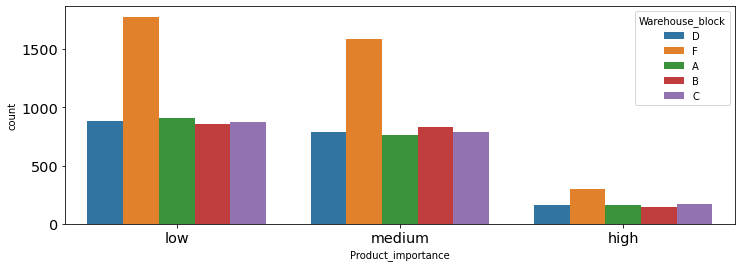

In [39]:
sns.countplot(x='Product_importance', data=df, hue='Warehouse_block');

Analisa:
* warehouse blok `F` cenderung memiliki produk dengan kategori LOW > MEDIUM > HIGH

Rekomendasi:
* Penyamaan distribusi produk tiap warehouse, supaya tidak terjadi over order di satu warehouse

#### Insight Ketiga

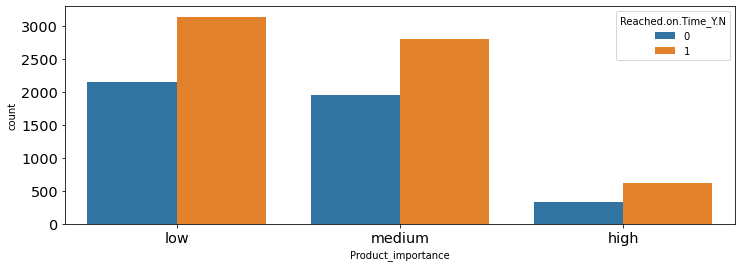

In [68]:
sns.countplot(x='Product_importance', data=df, hue='Reached.on.Time_Y.N');

Analisa:
* Produk dengan kategory LOW cenderung ON time dibandingkan dengan produk kategori lainnya

Rekomendasi:
* Berdasarkan visualisasi diatas, Jika melakukan promosi terhadap produk, itu lebih baik dilakukan terhadap produk yang LOW